In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns





def load_data():
    url = 'https://raw.githubusercontent.com/rfordatascience/' + \
    'tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'
    df = pd.read_csv(url)
    df_interim = df.copy()
    df_interim = df_interim[['total_cup_points',
                                'species',
                                'country_of_origin',
                                'variety',
                                'aroma',
                                'aftertaste',
                                'acidity',
                                'body',
                                'balance',
                                'sweetness',
                                'altitude_mean_meters', 'moisture']]
    df_interim = df_interim.dropna()
    df_interim["species"] = pd.Categorical(df_interim["species"])
    df_interim["country_of_origin"] = pd.Categorical(df_interim["country_of_origin"])
    df_interim["variety"] = pd.Categorical(df_interim["variety"])
    df_interim["specialty"] = df_interim["total_cup_points"].apply(lambda x: "yes" if x>82.43 else "no")
    df_interim["altitude"] = df_interim["altitude_mean_meters"].apply(lambda x:1300 if x > 1000 else x)
    df_interim["specialty"] = pd.Categorical(df_interim["specialty"])
    df_interim = df_interim[df_interim["acidity"]!=0].copy()
    df = df_interim.copy()
    return df
df_ch = load_data()
df_ch




,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture,specialty,altitude
1,89.92,Arabica,Ethiopia,Other,8.75,8.50,8.58,8.42,8.42,10.00,2075.00,0.12,yes,1300.0
2,89.75,Arabica,Guatemala,Bourbon,8.42,8.42,8.42,8.33,8.42,10.00,1700.00,0.00,yes,1300.0
4,88.83,Arabica,Ethiopia,Other,8.25,8.25,8.50,8.42,8.33,10.00,2075.00,0.12,yes,1300.0
9,88.25,Arabica,Ethiopia,Other,8.08,8.50,8.50,7.67,8.42,10.00,1822.50,0.10,yes,1300.0
11,87.92,Arabica,United States,Other,8.25,8.17,8.33,8.08,8.17,10.00,1872.00,0.00,yes,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,63.08,Arabica,Nicaragua,Caturra,7.25,6.33,6.25,6.42,6.08,6.00,1100.00,0.13,no,1300.0
1309,59.83,Arabica,Guatemala,Catuai,7.50,6.67,7.67,7.33,6.67,1.33,1417.32,0.10,no,1300.0
1319,82.50,Robusta,India,Other,7.67,7.58,7.83,7.83,8.00,7.92,1000.00,0.09,yes,1000.0
1322,81.58,Robusta,India,Other,7.67,7.75,7.50,7.75,7.58,7.75,1000.00,0.11,no,1000.0


In [6]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 1 to 1333
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      996 non-null    float64 
 1   species               996 non-null    category
 2   country_of_origin     996 non-null    category
 3   variety               996 non-null    category
 4   aroma                 996 non-null    float64 
 5   aftertaste            996 non-null    float64 
 6   acidity               996 non-null    float64 
 7   body                  996 non-null    float64 
 8   balance               996 non-null    float64 
 9   sweetness             996 non-null    float64 
 10  altitude_mean_meters  996 non-null    float64 
 11  moisture              996 non-null    float64 
 12  specialty             996 non-null    category
 13  altitude              996 non-null    float64 
dtypes: category(4), float64(10)
memory usage: 92.3 KB


In [7]:

df_ch.drop(["species","country_of_origin","variety"], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
total_cup_points,996.0,82.108434,2.616641,59.83,81.17,82.42,83.58,89.92
aroma,996.0,7.566466,0.301464,5.08,7.42,7.58,7.75,8.75
aftertaste,996.0,7.383805,0.329743,6.17,7.17,7.42,7.58,8.58
acidity,996.0,7.522199,0.302425,5.25,7.33,7.50,7.67,8.58
body,996.0,7.503896,0.270046,6.33,7.33,7.50,7.67,8.42
balance,996.0,7.499277,0.339359,6.08,7.33,7.50,7.67,8.58
sweetness,996.0,9.924869,0.441238,1.33,10.00,10.00,10.00,10.00
altitude_mean_meters,996.0,1821.866358,9144.237250,1.00,1100.00,1310.64,1600.00,190164.00
moisture,996.0,0.093785,0.044340,0.00,0.10,0.11,0.12,0.17
altitude,996.0,1179.671505,286.395820,1.00,1300.00,1300.00,1300.00,1300.00


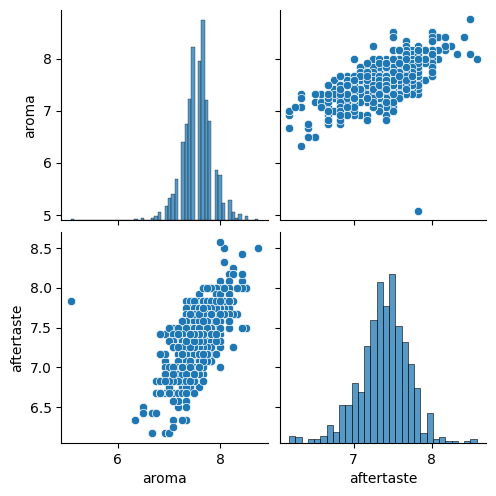

In [8]:
sns.pairplot(data = df_ch[["aroma","aftertaste"]])
plt.show()